In [70]:
!pip install pyresparse

  ERROR: Could not find a version that satisfies the requirement pyresparse (from versions: none)
ERROR: No matching distribution found for pyresparse


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import re

import nltk
from nltk.corpus import stopwords
import string

In [3]:
resumeDataSet = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet['encodedCategory'] = resumeDataSet['Category'].copy()

In [4]:
resumeDataSet.head()

,Category,Resume,cleaned_resume,encodedCategory
0,Data Science,Skills * Programming Languages: Python (pandas...,,Data Science
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,,Data Science
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",,Data Science
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,,Data Science
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",,Data Science


In [5]:
resumeDataSet['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [68]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
print (resumeDataSet['cleaned_resume'][0])

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance AssociateData Science Assurance Associate Ernst Young LLPSkill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the rev

In [7]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print("MOST COMMON", mostcommon)

MOST COMMON [('Exprience', 601), ('months', 499), ('company', 496), ('Details', 490), ('description', 436), ('1', 345), ('Project', 288), ('data', 243), ('project', 234), ('year', 218), ('SQL', 212), ('6', 209), ('Maharashtra', 205), ('team', 203), ('Less', 203), ('using', 195), ('January', 173), ('Management', 160), ('Pune', 147), ('C', 142), ('Education', 136), ('Ltd', 136), ('management', 135), ('database', 132), ('Data', 125), ('monthsCompany', 121), ('Engineering', 121), ('Server', 121), ('Database', 117), ('India', 117), ('like', 117), ('The', 116), ('various', 115), ('Pvt', 115), ('business', 114), ('application', 114), ('Responsibilities', 113), ('development', 112), ('System', 110), ('reports', 109), ('2', 109), ('A', 108), ('Java', 106), ('issues', 104), ('requirements', 104), ('Mumbai', 101), ('work', 98), ('system', 96), ('Role', 96), ('Test', 96)]


In [8]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['encodedCategory']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['encodedCategory'].values

print(resumeDataSet['cleaned_resume'].head())

0    Skills Programming Languages Python pandas num...
1    Education Details May 2013 to May 2017 B E UIT...
2    Areas of Interest Deep Learning Control System...
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...
4    Education Details MCA YMCAUST Faridabad Haryan...
Name: cleaned_resume, dtype: object


In [16]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=2000)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=2000)
char_vectorizer.fit(requiredText)
CharFeatures = char_vectorizer.transform(requiredText)
totalFeatures = hstack([WordFeatures, CharFeatures])
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(135, 1500)
(34, 1500)


In [18]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


Accuracy of KNeighbors Classifier on training set: 0.88
Accuracy of KNeighbors Classifier on test set: 0.79

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         4
          11       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67   

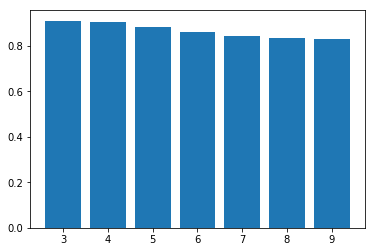

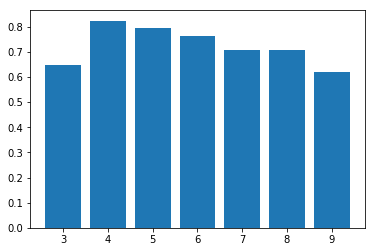

In [34]:
import matplotlib.pyplot as plt
train_scores = {}
test_scores = {}

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

for i in range(3,10):
    clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=i))
    clf.fit(X_train, y_train)
    train_scores[i] = clf.score(X_train, y_train)
    test_scores[i] = clf.score(X_test, y_test)

plt.bar(range(len(train_scores)), list(train_scores.values()), align='center')
plt.xticks(range(len(train_scores)), list(train_scores.keys()))
plt.show()

plt.bar(range(len(test_scores)), list(test_scores.values()), align='center')
plt.xticks(range(len(test_scores)), list(test_scores.keys()))
plt.show()

In [32]:
#ONE VS REST CLASSIFIER
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4))
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(prediction)

[ 9 14 17  5 11 22  6  6 21  7 14  2  3 23 15 16 15 18 13 23 20 20  9 20
 14  9 12 13  9 19  6 20 17 24]


In [33]:
count = 0
for i in range(len(y_test)):
    if y_test[i]==prediction[i]:
        count+=1
print(count/len(y_test)*100)

#best number of neighbors is 4

82.35294117647058


In [45]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=25)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("PREDICTION", prediction)
count = 0
for i in range(len(y_test)):
    if y_test[i]==prediction[i]:
        count+=1
print("ACCURACY", count/len(y_test)*100)

PREDICTION [ 9 14  7  5 11  1  6  6 21  7 14  2  3 16 15 16 15 18 13  2  6  6  9 11
 14 12  0 13  9  0  6  6 12 24]
ACCURACY 67.64705882352942


In [59]:
#SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', C=2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("PREDICTION", prediction)
print("TEST", y_test)
count = 0
for i in range(len(y_test)):
    if y_test[i]==prediction[i]:
        count+=1
print("ACCURACY", count/len(y_test)*100)

PREDICTION [ 9 14  7  5 12 12  6  6 21  7 14  2  3 23 15 16 15 23 13 15 12  8  9 12
 14 15  0 13  9 18  6 20 17 24]
TEST [ 9 14 17  5 11 22  6  6 21  7 14  2  3 11 15 16 15 11 13  2 20 20  9 23
 14  9  0 13  9  1  6 20 17 24]
ACCURACY 67.64705882352942


In [64]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("PREDICTION", prediction)
print("TEST", y_test)
count = 0
for i in range(len(y_test)):
    if y_test[i]==prediction[i]:
        count+=1
print("ACCURACY", count/len(y_test)*100)

PREDICTION [ 9 14  7  5 11 22  6  6 21  7 14  2  3 23 15 16 15  2 13 23  1 20  9  2
 14  9  0 13  9 18  6 20 17 24]
TEST [ 9 14 17  5 11 22  6  6 21  7 14  2  3 11 15 16 15 11 13  2 20 20  9 23
 14  9  0 13  9  1  6 20 17 24]
ACCURACY 79.41176470588235


In [67]:
#naive bayes classification
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train.toarray(), y_train)
prediction = model.predict(X_test.toarray())
print("PREDICTION", prediction)
print("TEST", y_test)
count = 0
for i in range(len(y_test)):
    if y_test[i]==prediction[i]:
        count+=1
print("ACCURACY", count/len(y_test)*100)

PREDICTION [ 8 18  7 18  6  8  6  6 21  7 18  2  8 11 15 18  8 18 13  2 15  7 24 18
 18  8  5 13  8 18  6  8 17 24]
TEST [ 9 14 17  5 11 22  6  6 21  7 14  2  3 11 15 16 15 11 13  2 20 20  9 23
 14  9  0 13  9  1  6 20 17 24]
ACCURACY 38.23529411764706
